# HIT PREDICTOR

Itzae Flores - Diego ValdéS - Tomás Dempster

### Importación librerias y datos

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [171]:
music_genre = pd.read_csv('music_genre.csv')
music_genre.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### Limpieza de datos

In [172]:
music_genre.describe().round(2)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,55888.40,44.22,0.31,0.56,221252.60,0.60,0.18,0.19,-9.13,0.09,0.46
std,20725.26,15.54,0.34,0.18,128671.96,0.26,0.33,0.16,6.16,0.10,0.25
min,20002.00,0.00,0.00,0.06,-1.00,0.00,0.00,0.01,-47.05,0.02,0.00
25%,37973.50,34.00,0.02,0.44,174800.00,0.43,0.00,0.10,-10.86,0.04,0.26
50%,55913.50,45.00,0.14,0.57,219281.00,0.64,0.00,0.13,-7.28,0.05,0.45
75%,73863.25,56.00,0.55,0.69,268612.25,0.82,0.16,0.24,-5.17,0.10,0.65
max,91759.00,99.00,1.00,0.99,4830606.00,1.00,1.00,1.00,3.74,0.94,0.99


Eliminar columnas que no se utilizarán y datos nulos o faltantes en el dataset. Cambiar columna 'popularity' a booleano.

In [173]:
# print cantidad de datos 
print("cantidad de datos antes de limpieza: ", music_genre.shape)

# Eliminar columnas que no se utilizarán
column_not_use = ['key', 'mode', 'obtained_date']
print("columnas que no se utilizaran y se eliminan: ", column_not_use)
music_genre.drop(column_not_use, axis = 1, inplace = True)

# Eliminar datos nulos 
music_genre.dropna(inplace = True)

# Eliminar filas duplicadas
music_genre.drop_duplicates(inplace = True)

# Eliminar filas donde tempo == '?', duration < 0
print("Se eliminan filas donde tempo == '?' y duration menos a 0")
music_genre.drop(music_genre[music_genre['tempo'] == '?'].index, inplace = True)
music_genre.drop(music_genre[music_genre['duration_ms'] < 0].index, inplace = True)

# print cantidad de datos
print("cantidad de datos despues de limpieza: ", music_genre.shape)

# Revisar si cambiamos la condicion de exito
print("La condicion de exito de una cancion es que tenga una popularidad mayor al promedio")

hit_comdition = music_genre['popularity'].mean()
music_genre['popularity'] = (music_genre['popularity'] >  hit_comdition).astype(bool)
music_genre.rename(columns = {'popularity': 'hit'}, inplace = True)
print(music_genre['hit'].value_counts())


cantidad de datos antes de limpieza:  (50005, 18)
columnas que no se utilizaran y se eliminan:  ['key', 'mode', 'obtained_date']
Se eliminan filas donde tempo == '?' y duration menos a 0
cantidad de datos despues de limpieza:  (40560, 15)
La condicion de exito de una cancion es que tenga una popularidad mayor al promedio
hit
True     20664
False    19896
Name: count, dtype: int64


Graficos de distribución de canciones por genero musical y popularidad de canciones

C:\Users\Tomas\AppData\Local\Temp\ipykernel_12572\2803776544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'music_genre', data = music_genre, palette = 'viridis')


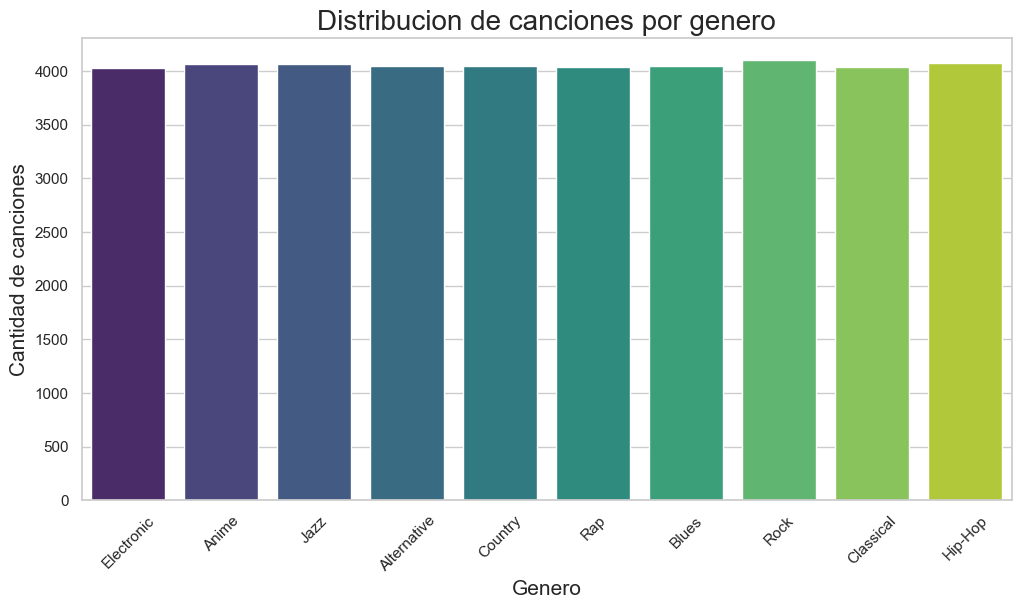

In [174]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'music_genre', data = music_genre, palette = 'viridis')
plt.title('Distribucion de canciones por genero', fontsize = 20)
plt.xlabel('Genero', fontsize = 15)
plt.ylabel('Cantidad de canciones', fontsize = 15)
plt.xticks(rotation = 45)
plt.show()

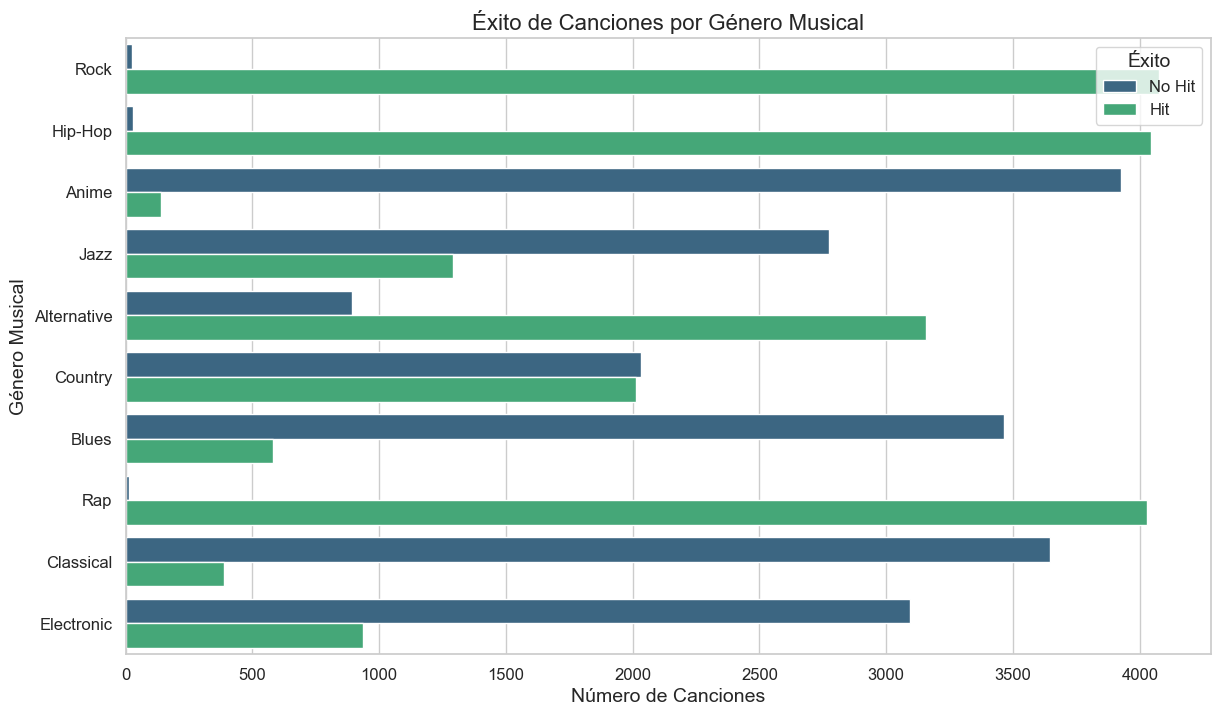

In [175]:
plt.figure(figsize=(14, 8))
sns.countplot(y='music_genre', data=music_genre, hue='hit', order=music_genre['music_genre'].value_counts().index, palette="viridis")
plt.title('Éxito de Canciones por Género Musical', fontsize=16)
plt.xlabel('Número de Canciones', fontsize=14)
plt.ylabel('Género Musical', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Éxito', loc='upper right', labels=['No Hit', 'Hit'], fontsize=12, title_fontsize=14)
plt.show()

Realizar one hot encoding y normalización de columnas numericas con MinMaxScaler.

In [176]:
# Convertir las columnas a numericas
numerical_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
for column in numerical_columns:
    music_genre[column] = pd.to_numeric(music_genre[column], errors='coerce')


# Normalizar las columnas numericas
scaler = MinMaxScaler()
music_genre[numerical_columns] = scaler.fit_transform(music_genre[numerical_columns])

# Convertir las columnas categoricas a strings
categorical_columns = ['music_genre'] # Tambien esta 'artist_name', 'track_name', 'category' pero sgn yo no se deberian de considerar para one hot encoding
for column in categorical_columns:
    music_genre[column] = music_genre[column].astype(str)
    
# one hot encoding para las columnas categoricas
music_genre = pd.get_dummies(music_genre, columns = categorical_columns)

### Analisis de datos

In [177]:
music_genre.describe().round(2)

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00,40560.00
mean,55874.83,0.31,0.54,0.05,0.60,0.18,0.19,0.75,0.08,0.46,0.46
std,20731.02,0.34,0.19,0.02,0.26,0.33,0.16,0.12,0.11,0.16,0.25
min,20002.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37994.75,0.02,0.41,0.04,0.43,0.00,0.09,0.71,0.02,0.33,0.26
50%,55899.50,0.14,0.55,0.05,0.64,0.00,0.12,0.78,0.03,0.46,0.45
75%,73817.50,0.55,0.68,0.06,0.82,0.15,0.24,0.82,0.08,0.57,0.65
max,91759.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [178]:
music_genre

,instance_id,artist_name,track_name,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
1,46652.0,Thievery Corporation,The Shining Path,False,0.012751,0.607081,0.045239,0.890804,0.953815,0.115446,...,False,False,False,False,False,True,False,False,False,False
2,30097.0,Dillon Francis,Hurricane,False,0.003072,0.604922,0.044641,0.755562,0.011847,0.529450,...,False,False,False,False,False,True,False,False,False,False
3,62177.0,Dubloadz,Nitro,False,0.025502,0.771157,0.033768,0.700463,0.002540,0.148769,...,False,False,False,False,False,True,False,False,False,False
4,24907.0,What So Not,Divide & Conquer,False,0.004669,0.624352,0.046149,0.587260,0.912651,0.148769,...,False,False,False,False,False,True,False,False,False,False
6,43760.0,Jordan Comolli,Clash,True,0.029016,0.553109,0.044372,0.803648,0.000008,0.097271,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,True,0.133534,0.852116,0.049561,0.660391,0.000008,0.289126,...,False,False,False,False,False,False,True,False,False,False
50001,43557.0,Roy Woods,Drama (feat. Drake),True,0.157631,0.700993,0.052728,0.361856,0.000000,0.100300,...,False,False,False,False,False,False,True,False,False,False
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),True,0.005994,0.683722,0.038812,0.763576,0.000000,0.134632,...,False,False,False,False,False,False,True,False,False,False
50003,57944.0,The-Dream,Shawty Is Da Shit,True,0.083434,0.779793,0.055162,0.472054,0.000000,0.097271,...,False,False,False,False,False,False,True,False,False,False


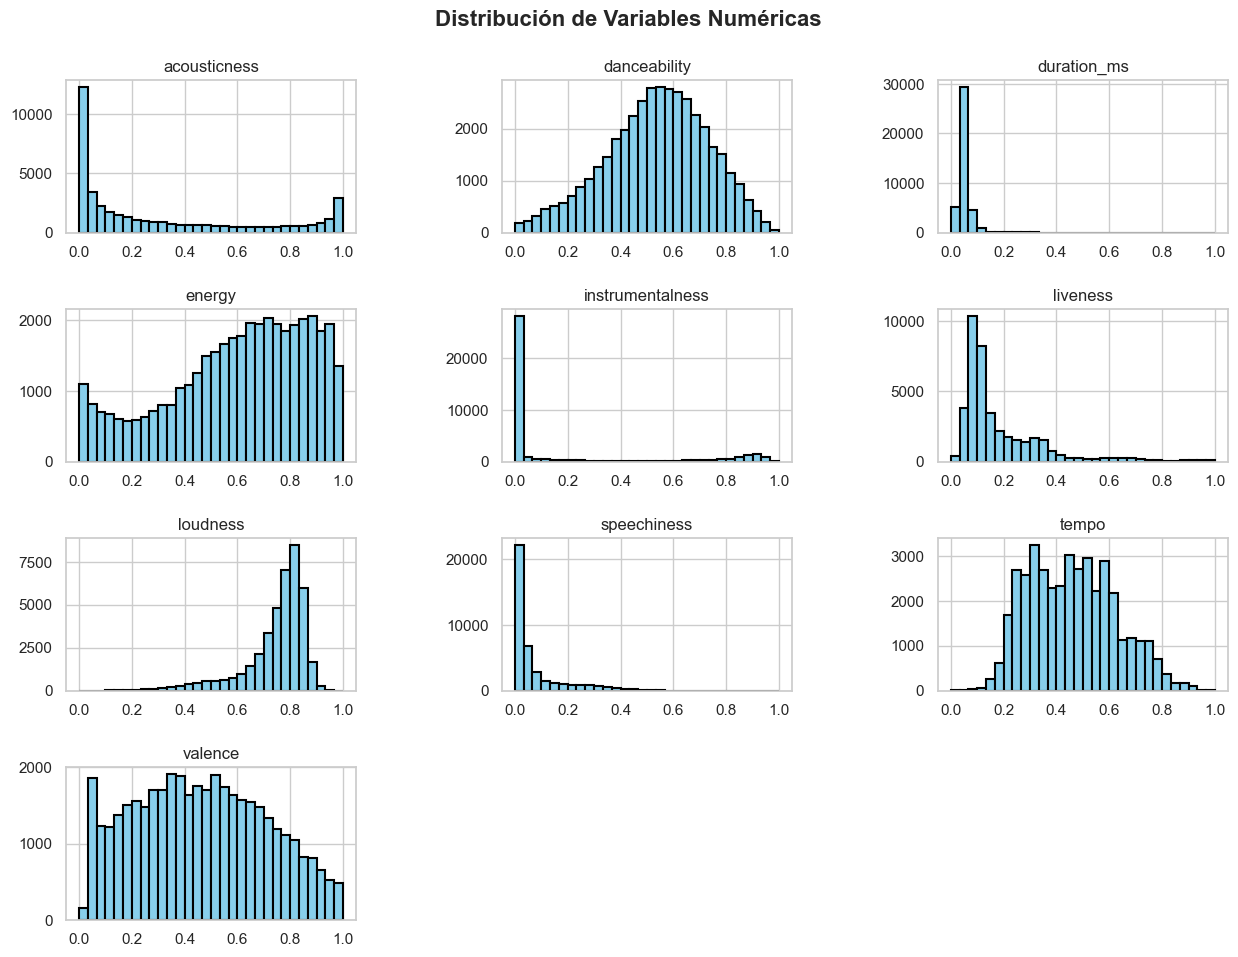

In [193]:
music_genre[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', linewidth=1.5)
plt.suptitle('Distribución de Variables Numéricas', fontsize=16, y=1.02, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.5, wspace=0.5)
plt.show()

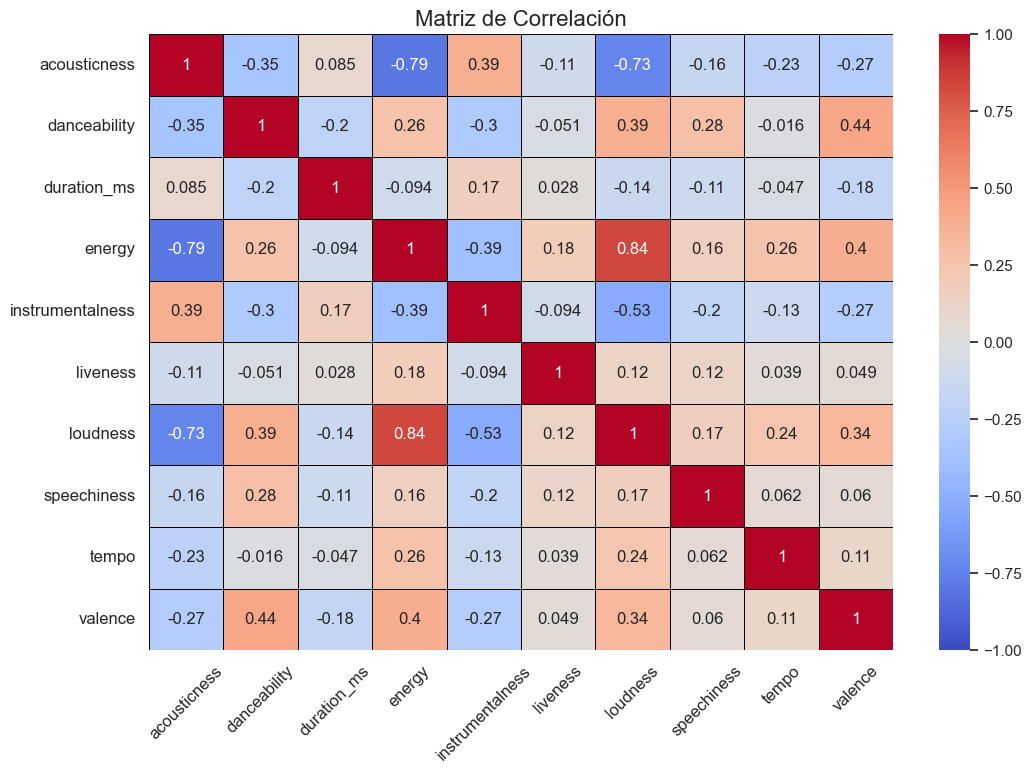

In [151]:
corr_matrix = music_genre[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

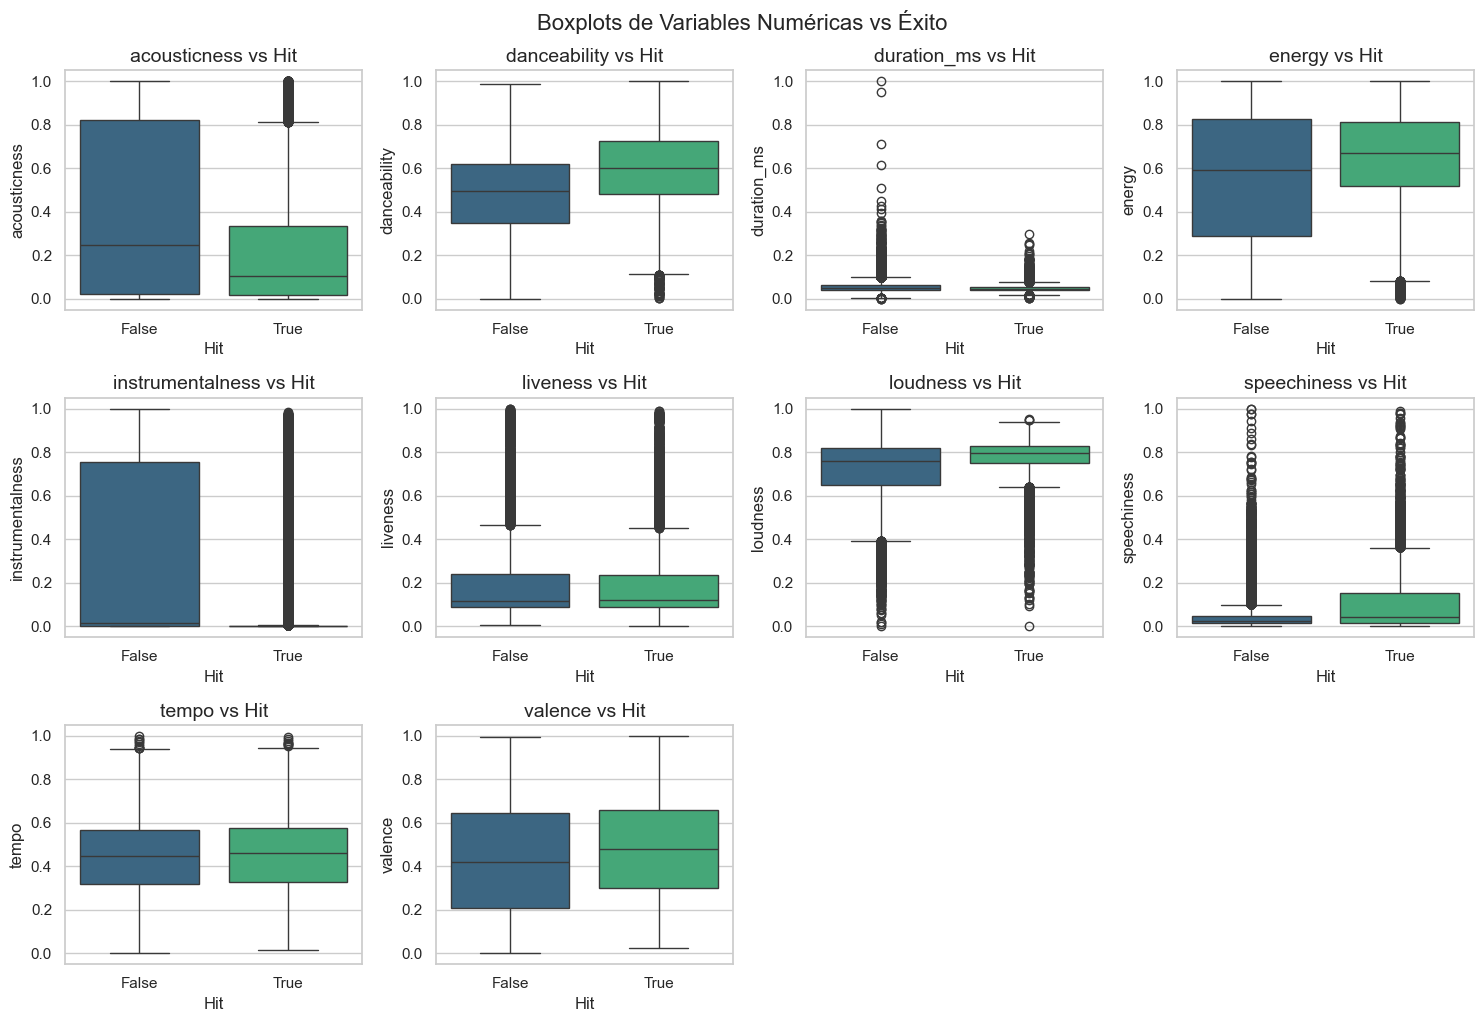

In [153]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='hit', y=col, data=music_genre, hue='hit', palette="viridis", legend=False)
    plt.title(f'{col} vs Hit', fontsize=14)
    plt.xlabel('Hit', fontsize=12)
    plt.ylabel(col, fontsize=12)
plt.tight_layout()
plt.suptitle('Boxplots de Variables Numéricas vs Éxito', fontsize=16, y=1.02)
plt.show()
